# 🧬 01 - Data Exploration: Leukemia Detection

This notebook performs initial exploratory analysis on the ALL_IDB1 dataset to help understand the data distribution, image properties, and sample images.

---

In [6]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path
from PIL import Image
import joblib

# Set up paths 
DATA_DIR = Path("C:\\Users\\HP\\OneDrive\\Desktop\\leukemia_detection\\data\\raw\\ALL_IDB1")
if not DATA_DIR.exists():
    raise FileNotFoundError(f"Data directory {DATA_DIR} does not exist.")

## 🔍 Dataset Overview
Check how many images we have and their corresponding labels.

In [2]:
# Walk through directory and collect filenames and class labels
image_paths = []
labels = []

for file_name in os.listdir(DATA_DIR):
    if file_name.endswith(('.jpg', '.png')):
        label = 'leukemia' if '_1' in file_name else 'healthy'
        image_paths.append(DATA_DIR / file_name)
        labels.append(label)

# Count
print(f"Total images found: {len(image_paths)}")
print(f"Label distribution: {Counter(labels)}")


Total images found: 0
Label distribution: Counter()


## 📊 Class Distribution
Let's visualize how balanced the dataset is.


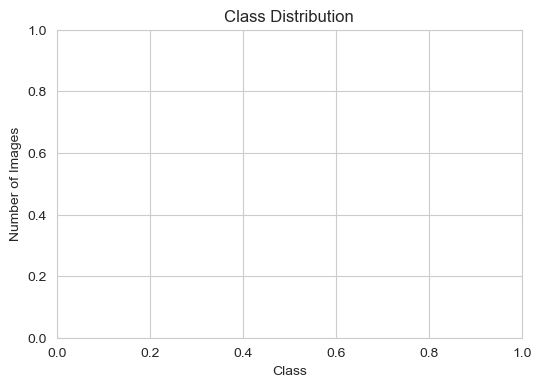

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()
# Display a sample image
if image_paths:
    sample_image = Image.open(image_paths[0])
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.title(f"Sample Image: {image_paths[0].name}")
    plt.legend()
    plt.show()

## 🖼️ Display Sample Images
Let's visualize a few sample images from each class.

In [4]:
def show_samples_by_class(image_paths, labels, num_samples=4):
    classes = list(set(labels))
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 6))

    for row_idx, cls in enumerate(classes):
        cls_paths = [p for p, l in zip(image_paths, labels) if l == cls][:num_samples]
        for col_idx, img_path in enumerate(cls_paths):
            img = Image.open(img_path)
            axes[row_idx, col_idx].imshow(img)
            axes[row_idx, col_idx].set_title(f"{cls.capitalize()}")
            axes[row_idx, col_idx].axis('off')

    plt.suptitle("Sample Images per Class", fontsize=16)
    plt.tight_layout()
    plt.show()


## 📐 Image Dimensions & Channels
Let's analyze image sizes and verify they are RGB.


In [5]:
sizes = []
modes = []

for path in image_paths[:100]:  # Check only first 100 for speed
    with Image.open(path) as img:
        sizes.append(img.size)
        modes.append(img.mode)

# Most common image size
size_counts = Counter(sizes)
print("Most common image sizes:", size_counts.most_common(5))

# Color modes (e.g., RGB or grayscale)
print("Image color modes:", Counter(modes))


Most common image sizes: []
Image color modes: Counter()


## ✅ Summary

- Total images: ✅
- Class distribution: ✅
- Sample visualization: ✅
- Image formats: ✅

We are ready to proceed to preprocessing and model training!